In [1]:
#import libraries
import numpy as np
import pandas as pd


In [3]:
#Get Data
column_names=['user_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep='\t',names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
movie_titles=pd.read_csv('Movie_Id_Titles.txt')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df=pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
#Visuakization Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline


In [9]:
#create a ratings dataframe with average rating and number of ratings
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Anna (1996)                               5.0
Prefontaine (1997)                        5.0
Boys, Les (1997)                          5.0
Maya Lin: A Strong Clear Vision (1994)    5.0
Delta of Venus (1994)                     5.0
Name: rating, dtype: float64

In [11]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             302
Contact (1997)               279
Fargo (1996)                 268
Scream (1996)                266
Return of the Jedi (1983)    259
Name: rating, dtype: int64

In [12]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())


In [13]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.500000
101 Dalmatians (1996),2.925926
12 Angry Men (1957),4.333333
187 (1997),2.900000


In [14]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,6
1-900 (1994),2.500000,2
101 Dalmatians (1996),2.925926,54
12 Angry Men (1957),4.333333,66
187 (1997),2.900000,20


<Axes: >

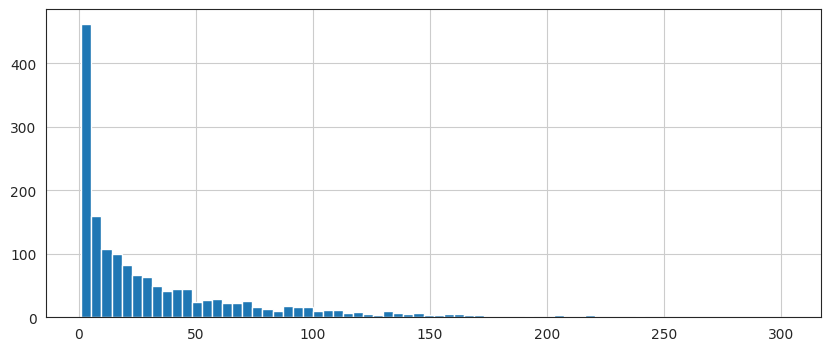

In [15]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<Axes: >

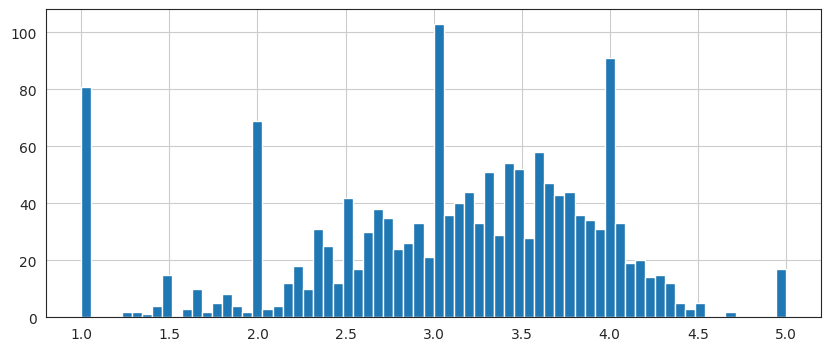

In [16]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

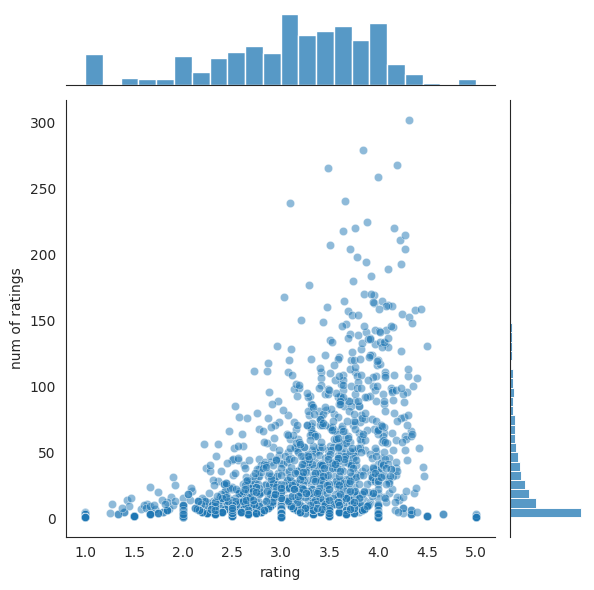

In [17]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)


Recommending Similar Movies

In [18]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,5.0,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ratings.sort_values('num of ratings',ascending=False).head(10)


,rating,num of ratings
title,,
Star Wars (1977),4.317881,302
Contact (1997),3.845878,279
Fargo (1996),4.190299,268
Scream (1996),3.488722,266
Return of the Jedi (1983),4.000000,259
"English Patient, The (1996)",3.659751,241
Liar Liar (1997),3.100418,239
Toy Story (1995),3.888889,225
Pulp Fiction (1994),4.159091,220


In [20]:
ratings.head()


,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,6
1-900 (1994),2.500000,2
101 Dalmatians (1996),2.925926,54
12 Angry Men (1957),4.333333,66
187 (1997),2.900000,20


In [21]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [22]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [23]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-1.000000
101 Dalmatians (1996),0.406307
12 Angry Men (1957),0.335458
187 (1997),0.000000


In [24]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)


,Correlation
title,
'Til There Was You (1997),1.0
Wild America (1997),1.0
Man of the Year (1995),1.0
Meet Wally Sparks (1997),1.0
Mercury Rising (1998),1.0
Star Wars (1977),1.0
"Awfully Big Adventure, An (1995)",1.0
"Ciao, Professore! (1993)",1.0
"Inspector General, The (1949)",1.0


In [25]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),1.000000,6
1-900 (1994),-1.000000,2
101 Dalmatians (1996),0.406307,54
12 Angry Men (1957),0.335458,66
187 (1997),0.000000,20


In [26]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()


,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,302
"Empire Strikes Back, The (1980)",0.863729,189
Return of the Jedi (1983),0.784388,259
Raiders of the Lost Ark (1981),0.535772,211
Star Trek III: The Search for Spock (1984),0.495759,102


In [27]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,239
Toy Story (1995),0.528225,225
"Saint, The (1997)",0.512841,168
Jurassic Park (1993),0.509992,137
Indiana Jones and the Last Crusade (1989),0.481511,170
